# Creating entanglement and Bell states

Entanglement is a strong quantum correlation between parts of the system. Before looking at how it differs from classical correlations, let us first have a look at ways of creating it. By definition, we need to have at least bi-partite system on which we "entangle" the parties. As can be expected a gate acting on both subsystems at the same time is necessary. A very usual choice for many reasons is the controlled NOT gate. This gate switches the output of the target qubit if and only if the first (control) qubit is in state one. For standard basis nothing special happens:
$$\mathrm{CNOT}_{1\to 2} |0\rangle\otimes|\psi\rangle = |0\rangle\otimes |\psi\rangle,\qquad
\mathrm{CNOT}_{1\to 2} |1\rangle\otimes|\psi\rangle = |0\rangle\otimes \sigma_x|\psi\rangle.$$

However, when we are no longer in the standard basis, this has interesting conseqences. For example we can apply the CNOT on state $|+\rangle\otimes|0\rangle$ and we obtain state
$$|\Phi^+\rangle=\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle).$$

This is an interesting state, as if Alice has first part of it and Bob the second, and they perform measurements on this states, their outcomes will be random, but always the same (correlated).

## Constructing the circuit for quantum entangled Bell states preparations

In [327]:
from math import pi, sin, cos, sqrt
import qiskit
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from random import randint, random

%matplotlib inline 

q = qiskit.QuantumRegister(2)
c = qiskit.ClassicalRegister(2)

simulator = qiskit.Aer.get_backend("qasm_simulator")
statevector = qiskit.Aer.get_backend('statevector_simulator')

Measurements

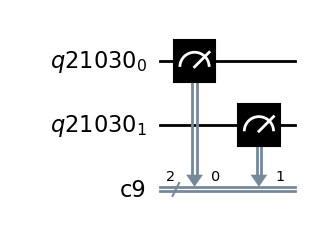

In [328]:
M = qiskit.QuantumCircuit(q, c)
M.measure(q, c)

M.draw(output="mpl")

Note the ordering of qubits in Qiskit. Qubit `q0` is drawn on top and is taken to be the least significant bit. Therefore qubit `q0` will be the rightmost in the ket notation $|q_1\rangle\otimes |q_0\rangle$. We can see this on the following simple example, where we just flip the qubit `q0` and then measure. In standard notation this would correspond to state $|10\rangle$, but in Qiskit it is state $|01\rangle$.

{'01': 1024}


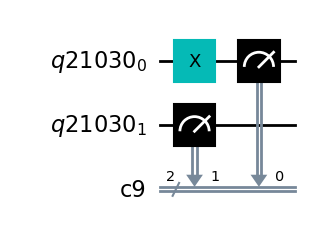

In [329]:
order = qiskit.QuantumCircuit(q, c)
order.x(0)
order.compose(M, inplace=True)

job = qiskit.execute(order, simulator, shots=1024)
print(job.result().get_counts())

order.draw(output="mpl")

### The easy state $|\Phi^+\rangle$

**Task 1:** Construct state $|\Phi^+\rangle$ by following the reasoning from the beginning of this notebook.

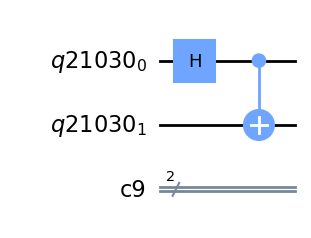

In [330]:
phi_plus = qiskit.QuantumCircuit(q, c)
phi_plus.h(0)
phi_plus.cx(0, 1)
phi_plus.draw(output="mpl")
# Complete the circuit part (without measurement)

In [331]:
obj = qiskit.assemble(phi_plus)
res = statevector.run(obj).result()
final_state = res.get_statevector()
qiskit.visualization.array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

Alice and Bob have always the same outcomes, althoug they appear randomly.

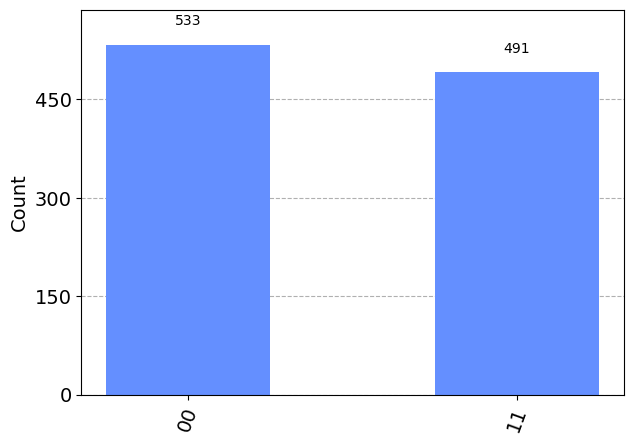

In [332]:
job = qiskit.execute(phi_plus.compose(M), simulator, shots=1024)
plot_histogram(job.result().get_counts())


**Task 2:** Make similar circuits for states $|\Phi^-\rangle$, $|\Psi^+\rangle$, $|\Psi^-\rangle$ which are obtained by using the same unitary transformation, but when instead of $|00\rangle$ the initial states are $|01\rangle$, $|10\rangle$, and $|11\rangle$ respectively.

These four states are called *Bell states* and form a basis in the two qubit space. These states possess *maximal* amount of quantum correlation and we will see in the next notebook how to show that these correlations differ from classical ones. Before all this, you can use quantum computer to prepare this state.

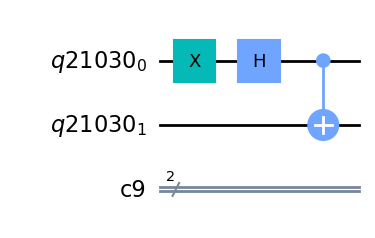

In [333]:
phi_minus = qiskit.QuantumCircuit(q, c)
phi_minus.x(0)
phi_minus.h(0)
phi_minus.cx(0, 1)
phi_minus.draw('mpl')

In [334]:
obj = qiskit.assemble(phi_minus)
res = statevector.run(obj).result()
final_state = res.get_statevector()
qiskit.visualization.array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

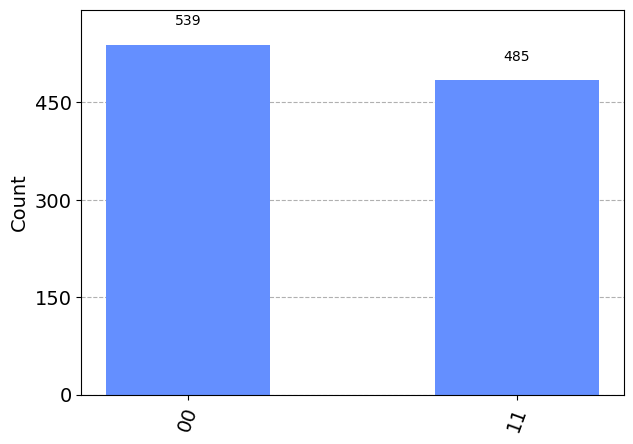

In [335]:
job = qiskit.execute(phi_minus.compose(M), simulator, shots=1024)
plot_histogram(job.result().get_counts())

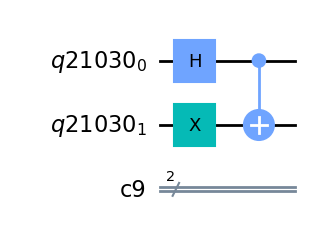

In [336]:
psi_plus = qiskit.QuantumCircuit(q, c)
psi_plus.h(0)
psi_plus.x(1)
psi_plus.cx(0, 1)
psi_plus.draw('mpl')

In [337]:
obj = qiskit.assemble(psi_plus)
res = statevector.run(obj).result()
final_state = res.get_statevector()
qiskit.visualization.array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

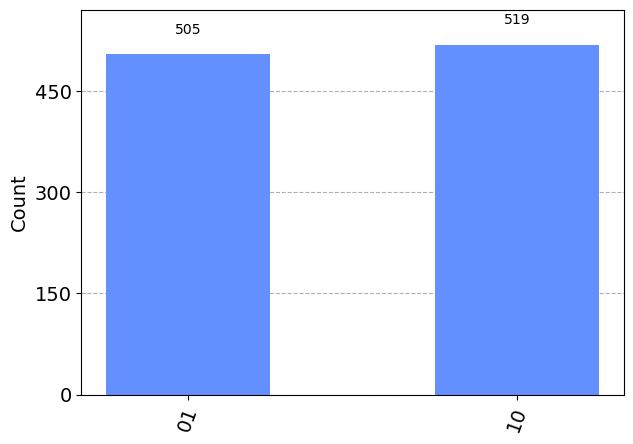

In [338]:
job = qiskit.execute(psi_plus.compose(M), simulator, shots=1024)
plot_histogram(job.result().get_counts())

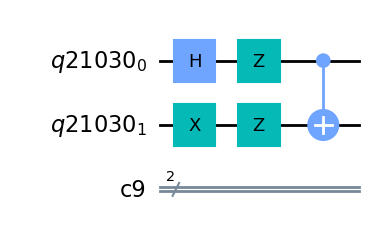

In [339]:
psi_minus = qiskit.QuantumCircuit(q, c)
psi_minus.h(0)
psi_minus.x(1)
psi_minus.z(0)
psi_minus.z(1)
psi_minus.cx(0, 1)
psi_minus.draw('mpl')

In [340]:
obj = qiskit.assemble(psi_minus)
res = statevector.run(obj).result()
final_state = res.get_statevector()
qiskit.visualization.array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

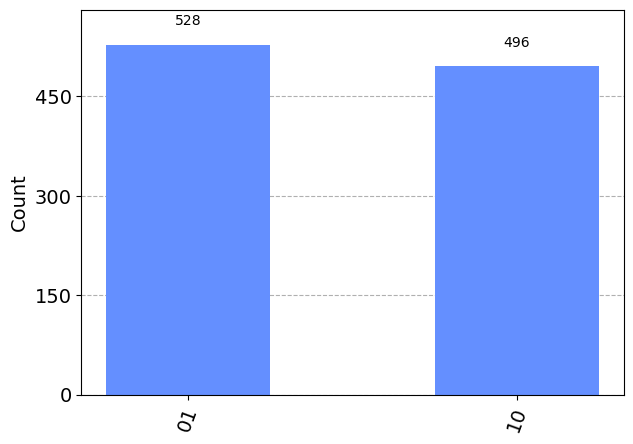

In [341]:
job = qiskit.execute(psi_minus.compose(M), simulator, shots=1024)
plot_histogram(job.result().get_counts())

## Running on quantum computer [optional]

You can run the previous codes also on quantum computer. If you do not have the IBMQ token, you can skip this part.

In [342]:
# from qiskit import IBMQ

# IBMQ.load_account()

In [343]:
# device = IBMQ.get_provider().get_backend("ibmq_lima")

In [344]:
# job = qiskit.execute(psi_minus.compose(M), device, shots=1024)
# from qiskit.tools.monitor import job_monitor
# job_monitor(job)

In [345]:
# result = job.result()
# counts = result.get_counts()
# plot_histogram(counts)

We observe two things. One is, that the job gets into a queue and we need to wait for it to run. Feel free to play with it as much as you want, or as much as the IBM will allow you to do (as a free user you have some amout of credits and each "quantum" run will reduce your credit; the credit slowly replenishes itself over time). That is why we will stick to simulators only.

Another point worth noting is, that unlike in simulator, which gave only answers 00 and 11, a real quantum computer makes "mistakes" and so we find also results 01 and 10.

## Measurements in Bell basis

We now know how to prepare any of the Bell states. We did that by choosing one of the four states of the two-qubit computational basis and applying $V=\mathrm{CNOT}(H\otimes\mathbb 1)$ on this state. But since the Bell states form an orthonormal basis, we can perform measurement in this *Bell basis*. To do that, we use the knowledge from previous tutorial on how to measure in sny basis. In particular, the measurement will be done by applying $V^\dagger$ on the measured state before the measurement in the computational basis. Afterwards, the outcomes should correspond to particular Bell states using the key
$$ |00\rangle \mapsto |\Phi^+\rangle,\qquad
   |01\rangle \mapsto |\Phi^-\rangle,\qquad
   |10\rangle \mapsto |\Psi^+\rangle,\qquad
   |11\rangle \mapsto |\Psi^-\rangle.
   $$

**Task 3:** Construct a circuit performing measurement in the Bell basis.

In [346]:
Mbell = qiskit.QuantumCircuit(q, c)
Mbell.cx(0,1)
Mbell.h(0)
Mbell.measure(0,0)
Mbell.measure(1,1)
# Provide code for circuit Mbell that performs measurement in the Bell basis.

To provide a better way of identifying measured Bell state, we provide following function.

In [347]:
def rename_bell(counts):
    new_counts = {}
    trans = {"00": "Phi+", "01": "Phi-", "10": "Psi+", "11": "Psi-"}
    for key in counts:
        new_counts[trans[key]] = counts[key]
    return new_counts

Bellow are some tests you can perform on your circuit performing the Bell measurement.

In [348]:
job = qiskit.execute(phi_plus.compose(Mbell), simulator, shots=1024)
print(f"State |Phi+> was identified as {rename_bell(job.result().get_counts())}")

job = qiskit.execute(phi_minus.compose(Mbell), simulator, shots=1024)
print(f"State |Phi-> was identified as {rename_bell(job.result().get_counts())}")

job = qiskit.execute(psi_plus.compose(Mbell), simulator, shots=1024)
print(f"State |Psi+> was identified as {rename_bell(job.result().get_counts())}")

job = qiskit.execute(psi_minus.compose(Mbell), simulator, shots=1024)
print(f"State |Psi-> was identified as {rename_bell(job.result().get_counts())}")

job = qiskit.execute(Mbell, simulator, shots=1024)
print(f"Measurement of state |00> in Bell basis gives {rename_bell(job.result().get_counts())}")

State |Phi+> was identified as {'Phi+': 1024}
State |Phi-> was identified as {'Phi-': 1024}
State |Psi+> was identified as {'Psi+': 1024}
State |Psi-> was identified as {'Psi-': 1024}
Measurement of state |00> in Bell basis gives {'Phi-': 511, 'Phi+': 513}


## Bell states under local transformations

Let us now consider a local basis rotation for both Alice and Bob in the form $U\otimes U$. If we would choose such changes at random, what would happen to our (anti)correlated measurement outcomes?

Let us define a procedure that will take care of this. Having a state preparation as an input, it will run `runs` times and in each case it will choose some random unitary $U$ prepare the `state` and apply unitary $U$ on both qubits simultaneously. Afterwards it performs the measurement and records the result.

**Task 4:** Write function `random_rot` that performs the "synchronized" rotation $U\otimes U$ for a matrix $U$ randomly generated in every run. The measurement is performed on the `state_preparation_circuit` and using `measurement_circuit`. Return the statistics of obtained outcomes that you gather in variable `out`.

In [349]:
import math
import random
def random_rot(state_preparation_circuit, measurement_circuit, quantum_register, runs=1024):
    out = {"00":0, "01":0, "10":0, "11":0}
    for i in range(runs):
        # Having input state, generate random unitary which is applied on both qubits
        # and collect the statistics to see how the state behaves
        # under these local transformations
        theta = math.pi * random.random() # theta can be restricted to interval [0, pi]
        phi = 2 * math.pi * random.random() # phi will be from interval [0, 2pi]
        lam = 2 * math.pi * random.random() # lambda will be from interval [0, 2pi]
        state_preparation_circuit.u(theta, phi, lam, 0)
        state_preparation_circuit.u(theta, phi, lam, 1)

        job = qiskit.execute(state_preparation_circuit.compose(measurement_circuit), simulator, shots=1)
        out[list(job.result().get_counts().keys())[0]] += 1
    
    return out  

Let us see what happens for different Bell states. To get the best result, we measure the randomly rotated Bell states in the Bell basis.

In [350]:
phi_plus_rot = random_rot(phi_plus, Mbell, q)
phi_minus_rot = random_rot(phi_minus, Mbell, q)
psi_plus_rot = random_rot(psi_plus, Mbell, q)
psi_minus_rot = random_rot(psi_minus, Mbell, q)

State $|\Phi^+\rangle$

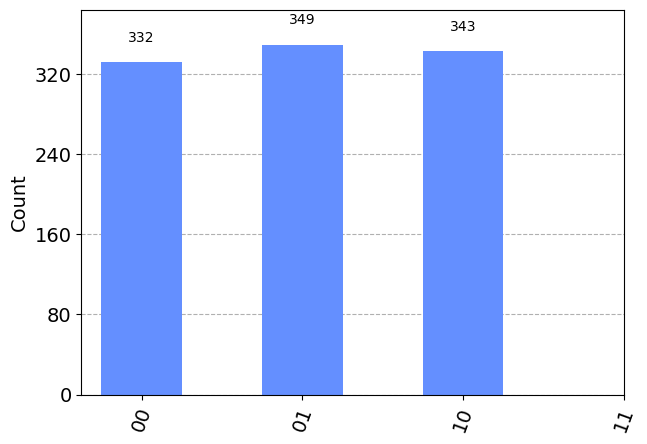

In [351]:
plot_histogram(phi_plus_rot)

State $|\Phi^-\rangle$

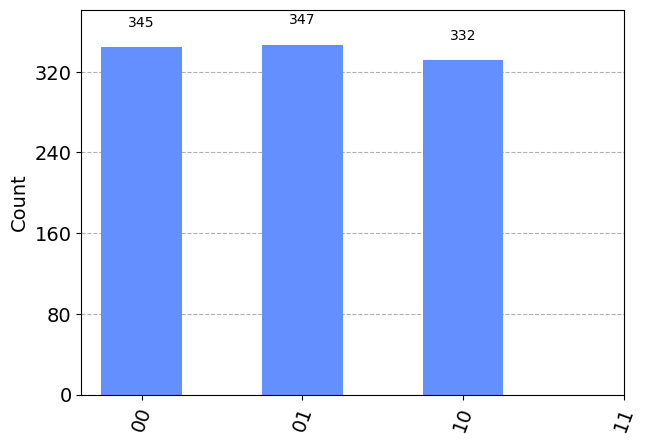

In [352]:
plot_histogram(phi_minus_rot)

State $|\Psi^+\rangle$

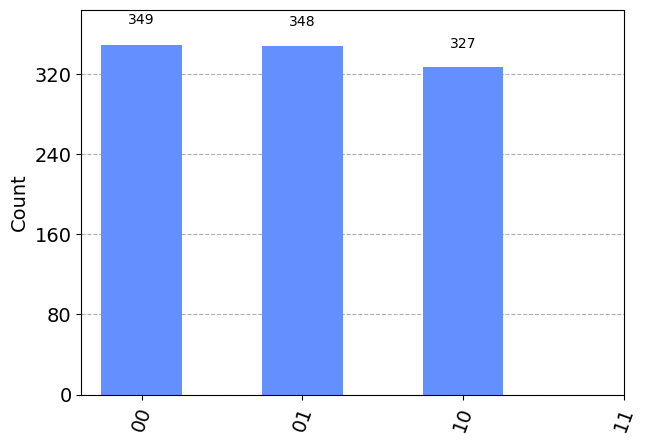

In [353]:
plot_histogram(psi_plus_rot)

State $|\Psi^-\rangle$

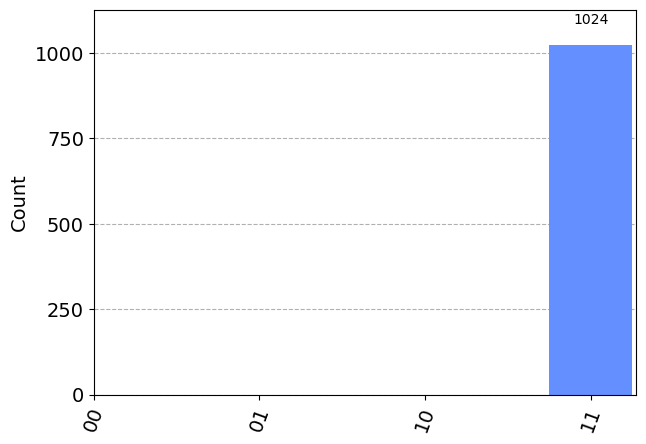

In [354]:
plot_histogram(psi_minus_rot)

While in all previous cases we see that the corresponding Bell state changed after the transformation, in the case of $|\Psi^-\rangle$ the state remains unchanged. This is a very important detail. In all other states this holds only for particular rotations but here it always works.